<a href="https://colab.research.google.com/github/TypeMIN/ML_study/blob/master/09_3_LSTM_%26_GRU_cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM과 GRU 셀

## LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [5]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 46ms/step - loss: 0.6920 - accuracy: 0.5446 - val_loss: 0.6906 - val_accuracy: 0.5976
Epoch 2/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6879 - accuracy: 0.6271 - val_loss: 0.6842 - val_accuracy: 0.6568
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6741 - accuracy: 0.6747 - val_loss: 0.6580 - val_accuracy: 0.6790
Epoch 4/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6043 - accuracy: 0.7181 - val_loss: 0.5721 - val_accuracy: 0.7316
Epoch 5/100
313/313 [==============================] - 19s 61ms/step - loss: 0.5536 - accuracy: 0.7437 - val_loss: 0.5441 - val_accuracy: 0.7450
Epoch 6/100
313/313 [==============================] - 18s 59ms/step - loss: 0.5290 - accuracy: 0.7573 - val_loss: 0.5223 - val_accuracy: 0.7572
Epoch 7/100
313/313 [==============================] - 18s 59ms/step - loss: 0.5083 - accuracy: 0.7684 - val_loss: 0.5054 - val_ac

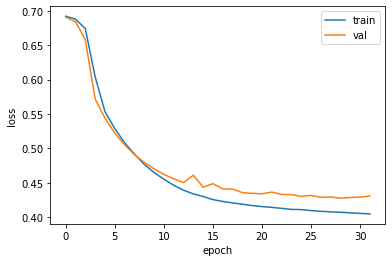

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환층에 드롭아웃 적용하기

In [10]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 50ms/step - loss: 0.6927 - accuracy: 0.5271 - val_loss: 0.6922 - val_accuracy: 0.5576
Epoch 2/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6913 - accuracy: 0.5859 - val_loss: 0.6903 - val_accuracy: 0.5884
Epoch 3/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6867 - accuracy: 0.6259 - val_loss: 0.6827 - val_accuracy: 0.5740
Epoch 4/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6605 - accuracy: 0.6202 - val_loss: 0.6348 - val_accuracy: 0.7122
Epoch 5/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6128 - accuracy: 0.7274 - val_loss: 0.6039 - val_accuracy: 0.7324
Epoch 6/100
313/313 [==============================] - 15s 48ms/step - loss: 0.5886 - accuracy: 0.7405 - val_loss: 0.5835 - val_accuracy: 0.7508
Epoch 7/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5716 - accuracy: 0.7558 - val_loss: 0.5659 - val_ac

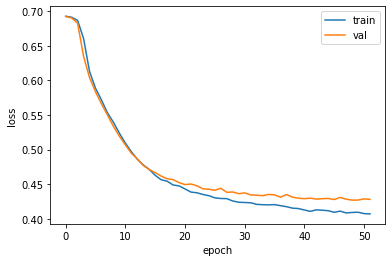

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

In [13]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 31s 84ms/step - loss: 0.6927 - accuracy: 0.5353 - val_loss: 0.6921 - val_accuracy: 0.5708
Epoch 2/100
313/313 [==============================] - 25s 81ms/step - loss: 0.6905 - accuracy: 0.5990 - val_loss: 0.6882 - val_accuracy: 0.6302
Epoch 3/100
313/313 [==============================] - 25s 81ms/step - loss: 0.6813 - accuracy: 0.6399 - val_loss: 0.6696 - val_accuracy: 0.6702
Epoch 4/100
313/313 [==============================] - 25s 81ms/step - loss: 0.6378 - accuracy: 0.6780 - val_loss: 0.5948 - val_accuracy: 0.7056
Epoch 5/100
313/313 [==============================] - 26s 84ms/step - loss: 0.5614 - accuracy: 0.7233 - val_loss: 0.5419 - val_accuracy: 0.7334
Epoch 6/100
313/313 [==============================] - 26s 84ms/step - loss: 0.5295 - accuracy: 0.7445 - val_loss: 0.5141 - val_accuracy: 0.7512
Epoch 7/100
313/313 [==============================] - 26s 82ms/step - loss: 0.5067 - accuracy: 0.7598 - val_loss: 0.4930 - val_ac

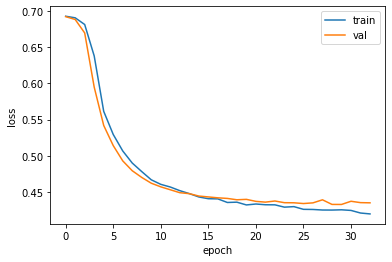

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 신경망 훈련하기

In [19]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [20]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [21]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 46ms/step - loss: 0.6916 - accuracy: 0.5428 - val_loss: 0.6900 - val_accuracy: 0.5780
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6874 - accuracy: 0.5985 - val_loss: 0.6852 - val_accuracy: 0.6090
Epoch 3/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6802 - accuracy: 0.6256 - val_loss: 0.6763 - val_accuracy: 0.6326
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6675 - accuracy: 0.6455 - val_loss: 0.6608 - val_accuracy: 0.6512
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6452 - accuracy: 0.6682 - val_loss: 0.6332 - val_accuracy: 0.6732
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6006 - accuracy: 0.7004 - val_loss: 0.5697 - val_accuracy: 0.7246
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5292 - accuracy: 0.7462 - val_loss: 0.5198 - val_ac

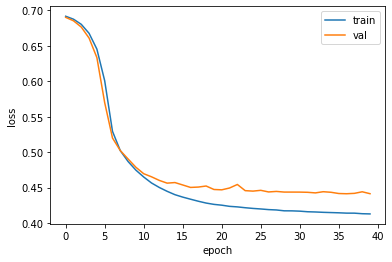

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 마무리

In [23]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 14ms/step - loss: 0.4291 - accuracy: 0.8010


[0.42913997173309326, 0.8009600043296814]